Latex defintions used in this notebook.
\begin{equation}
\def\xvec{{\mathbf x}}
\def\muvec{{\boldsymbol \mu}}
\def\trans{^\mathsf{T}}
\end{equation}

# Binomial distribution

\begin{equation}
P(r  |  p, n) \, = \, _nC_r \, p^r(1-p)^{n-r}\, = \, \left(
   \begin{array}{c}
    n \\
    r
  \end{array} \right) \, p^r(1-p)^{n-r} \,
= \, \frac{n!}{r!(n-r)!} \, p^r(1-p)^{n-r}
\end{equation}

where $0 \leq p \leq 1$, $n \geq 0$, $r \leq n$.

We can plot this with dbinom in R. 

First set the default size of the plots.

In [2]:
options(repr.plot.width=4, repr.plot.height=4)

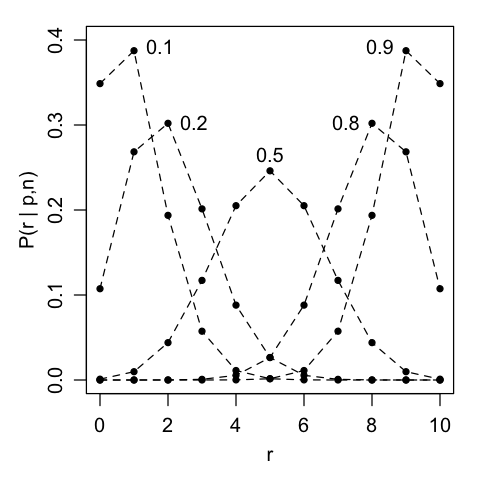

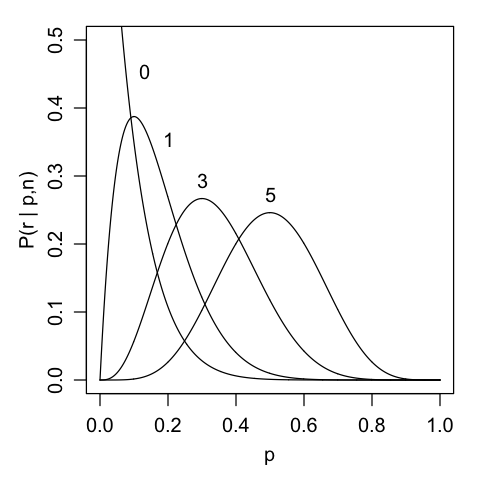

In [25]:
##### Plot the binomial distribution

# Plot P vs. r for fixed n for a range of p
n <- 10
r <- 0:n
pseq <- c(0.1, 0.2, 0.5, 0.8, 0.9)
#pdf("dbinom1.pdf", 4, 4)
par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(r, r, type="n", xlim=c(0,max(r)), ylim=c(0,0.4), xlab="r", 
     ylab="P(r | p,n)")
for (p in pseq) {
  points(r, dbinom(x=r, size=n, prob=p), pch=20)
  lines(r,  dbinom(x=r, size=n, prob=p), lty=2)
}
text(c(1,2,5,8,9), c(0.39,0.30,0.285,0.30,0.39), pseq, pos=c(4,4,1,2,2))
#dev.off()

# Plot P vs. p for fixed n for a range of r. This is NOT a density function in p!
p    <- seq(from=0, to=1, by=0.001)
rseq <- c(0,1,3,5)
n    <- 10
#pdf("dbinom2.pdf", 4, 4)
par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(p, p, type="n", xlim=range(p), ylim=c(0,0.5), xlab="p", 
     ylab="P(r | p,n)")
for (r in rseq) {
  lines(p,  dbinom(x=r, size=n, prob=p))
}
text(c(0.08,0.15,0.25,0.45), c(0.45,0.35,0.29,0.27), rseq, pos=4)
#dev.off()


# Poisson distribution

\begin{equation}
P(r |  \lambda) \,=\, \frac{e^{-\lambda}\lambda^r}{r!} 
\end{equation}

where $\lambda > 0, \ r\geq0$.

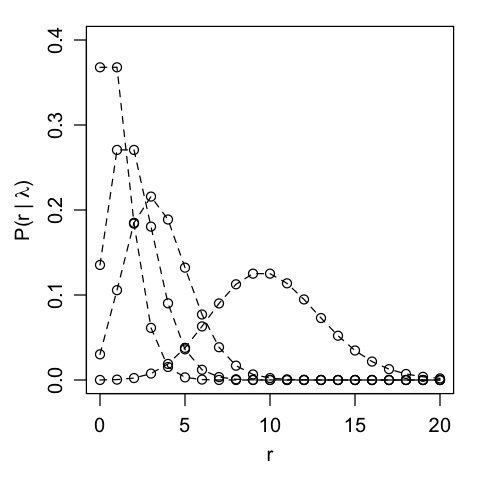

In [26]:
#pdf("dpois1.pdf", 4, 4)
par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
r <- 0:20
plot(r, r, type="n", xlim=c(0,max(r)), ylim=c(0,0.4), 
  xlab="r", ylab=expression(paste(, "P(r | ", lambda, ")")))
for (lambda in c(1,2,3.5,10)) { 
  points(r, dpois(x=r, lambda=lambda))
  lines(r,  dpois(x=r, lambda=lambda), lty=2)
}
#dev.off()

# Gaussian distribution

\begin{equation}
P(x) \,=\, \frac{1}{\sigma\sqrt{2 \pi}} \exp{ \left[ -\frac{(x-\mu)^2}{2\sigma^2} \right] }
\end{equation}

where $\sigma > 0$.

# Multivariate Gaussian distribution

Let $\xvec$ be a $J$-dimensional vector of the variables, the mean of which is $\muvec$ (also a $J$-dimensional vector). The $J$-dimensional Gaussian PDF is defined as
\begin{equation}
P(x_1, \dots, x_J) = \frac {1} {(2\pi)^{J/2}|\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (\xvec - \muvec)\trans \Sigma^{-1}(\xvec - \muvec) \right)  
\end{equation}
where $\Sigma$ is the $J \times J$ covariance matrix of the data,
$|\Sigma|$ is its determinant, and $(\xvec - \muvec)\trans$ denotes the transpose
of the $J \times 1$ column vector $(\xvec - \muvec)$. (My vectors are column vectors by default.)

If the variables are independent of one another then the
covariance matrix is diagonal. In two dimensions, writing $\xvec = (x,y)$, the covariance matrix is
\begin{equation}
\Sigma \, = \, \begin{bmatrix} \sigma^2_x & \rho\sigma_x\sigma_y \\ \rho\sigma_x\sigma_y & \sigma^2_y \end{bmatrix} \quad
\end{equation}
and the distribution is
\begin{equation}
P(x, y) = \frac {1} {2\pi|\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (\xvec - \muvec)\trans \Sigma^{-1} (\xvec - \muvec) \right)  
\end{equation}
where $|\Sigma| = \sigma_x^2 \sigma_y^2(1-\rho^2)$.
The locus of points with constant probability density is given when the argument of the exponential is constant.
Consider for convenience the zero mean Gaussian with zero covariance, in which case
\begin{equation}
\Sigma^{-1} \, = \, \begin{bmatrix} \frac{1}{\sigma^2_x} & 0 \\ 0 & \frac{1}{\sigma^2_y} \end{bmatrix} \quad \ .
\end{equation}
Performing the matrix multiplications we see that the locus of points of constant probability is
\begin{equation}
\frac{x^2}{\sigma_x^2} + \frac{y^2}{\sigma_y^2}  \,=\, {\rm constant} \ .
\end{equation}
This is the equation for an \index{ellipse} ellipse. We can show that if the covariance is non-zero then this just tilts the ellipse. So we can always 
transform a two-dimensional Gaussian distribution with non-zero covariance into a two-dimensional Gaussian with zero covariance by rotating the axes (and likewise for higher dimensional Gaussians). 
The following code plots a bivariate Gaussian with non-zero covariance both as a 3D perspective mesh and as a contour plot.


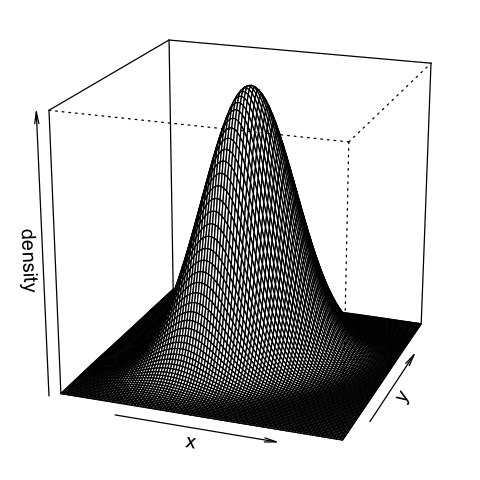

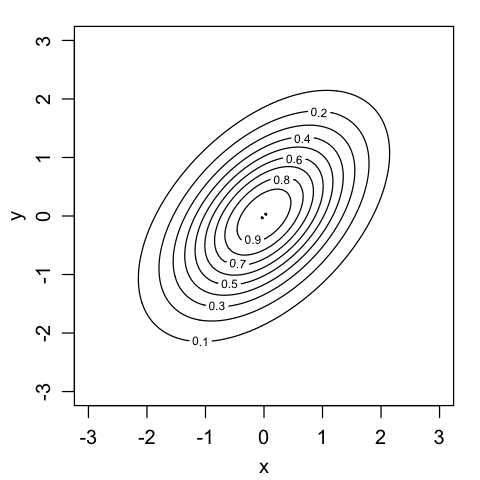

In [3]:
library(mvtnorm) # for dmvnorm
sigma.x <- 1
sigma.y <- 1
rho <- 0.5 # correlation coefficient
Cov <- matrix(data=c(sigma.x^2, rho*sigma.x*sigma.y, rho*sigma.x*sigma.y,
                     sigma.y^2), nrow=2, ncol=2)
Nsig  <- 3.5
Nsamp <- 100
x <- seq(from=-Nsig*sigma.x, to=Nsig*sigma.x, length.out=Nsamp)
y <- seq(from=-Nsig*sigma.y, to=Nsig*sigma.y, length.out=Nsamp)
z <- matrix(dmvnorm(x=expand.grid(x,y), mean=c(0,0), sigma=Cov), 
            nrow=length(x), ncol=length(y))
z <- z/max(z)

#pdf("2D_gaussian_3Dmesh.pdf", 4, 4)
par(mfrow=c(1,1), mar=c(1,1,1,1), oma=c(0,0,0,0), mgp=c(2.2,0.8,0), cex=1.0) 
persp(x=x, y=y, z=z, phi=20, theta=20, d=5, zlab="density")
#dev.off()

#pdf("2D_gaussian_contours.pdf", 4, 4)
par(mfrow=c(1,1), mgp=c(2.0,0.8,0), mar=c(3,3,1,1), oma=0.1*c(1,1,1,1))
contour(x, y, z, asp=1, xlim=c(-3,3), ylim=c(-3,3), xlab="x", ylab="y")
#dev.off()


# Cumulative distribution function and quartile function

Given a continuous, one-dimensional PDF $P(x)$, the cumulative distribution function (CDF)
is the probability that $x$ is less than some value $q$. This is
\begin{equation}
C(q) \,=\, P(x<q) \,=\, \int_{- \infty}^q P(x) \, dx \ .
\label{eqn:CDF}
\end{equation}
$C(q)$ is a 
monotonically non-decreasing function of $q$, and as $P(x)$ is normalized, $C(q)$ lies between 0 and 1.
The derivative of the CDF is the PDF. The CDF is only defined for univariate probability distributions.

The inverse function of the CDF is the quantile function $Q(p)$.  It gives the value of $x$ below which the integral of $P(x)$ is equal to $p$. 

The following plots the cumulative distribution function $C(q)$ versus the quantile function $Q(p)$ for two 
zero-mean Gaussian distributions (solid lines) with $\sigma=1$ (steeper function) 
and $\sigma=3$, and for a Cauchy distribution (dashed line) with mode zero and 
the same FWHM as the Gaussian with $\sigma=1$.

In [11]:
options(repr.plot.width=5.5, repr.plot.height=4)

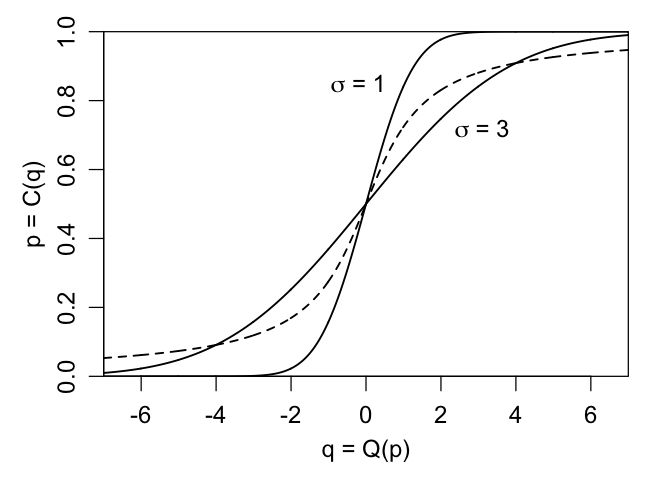

In [12]:
par(mfrow=c(1,1), xaxs="i", yaxs="i", mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1), cex=1.2)
q <- seq(from=-7, to=+7, by=0.01)
plot(q, q, type="n", xlim=range(q), ylim=c(0,1), xaxs="i", yaxs="i", 
     xlab="q = Q(p)", ylab="p = C(q)")
lines(q, pnorm(q, mean=0, sd=1), lwd=1.5)
lines(q, pnorm(q, mean=0, sd=3), lwd=1.5)
lines(q, pcauchy(q, location=0, scale=sqrt(2*log(2))), lty=2, lwd=1.5)
text(-0.2, 0.85, expression(paste(sigma, " = 1")))
text(3.1, 0.72, expression(paste(sigma, " = 3")))

For many standard distributions R has a set of built-in functions for calculating quantities from the distribution.
For example, for the normal distribution they are

* ${\tt dnorm(x)} \, = \, P(x)$, the probability density function (PDF)
* ${\tt pnorm(q)} \, = \, p \, = \, \int_{- \infty}^q P(x) \, dx$, the cumulative distribution function (CDF)
* ${\tt qnorm(p)}$ the quantile function, which is the inverse function of ${\tt pnorm(q)}$
* ${\tt rnorm}$ draws a random number from the distribution.
